In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('dengue.csv')

x = data[[ 'h10pix', 'Xmin', 'Ymin']]
x.dropna()

Sum_of_squared_distances = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure()
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import datetime
import time
data = pd.read_csv('BreadBasket_DMS.csv')

tiempo = data['Time']
dia = data['Date']
item = data['Item']
tran = data['Transaction']
item = np.asarray(item)
tran = np.asarray(tran)

ftr = [3600,60,1]
t = []

for i in range(0,len(tiempo)):
    timestr = tiempo[i]
    t.append(sum([a*b for a,b in zip(ftr, map(int,timestr.split(':')))]))
t = np.asarray(t)
d = []



[[35891     1]
 [36334     2]
 [36334     2]
 ...
 [53826  9683]
 [53826  9683]
 [54264  9684]]


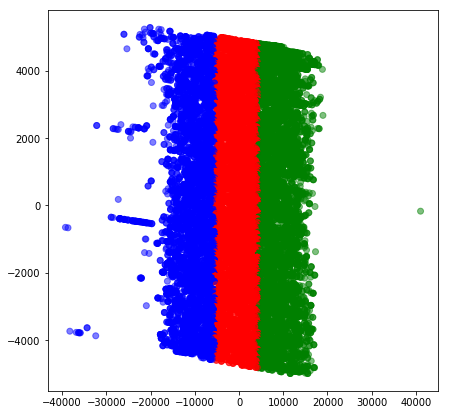

In [15]:
#for i in range(0, len(dia)):
 #   datestr = dia[i]
  #  num = datestr.split('-')
   # n = num[0]*10000
    #n = num[1]*100+n
    #n = num[2] +n
    #d.append(n)

t = np.asarray(t)
d = np.asarray(d)


     
dat = []
for i in range(0,len(item)):
    dd = [t[i],tran[i]]
    dat.append(dd)
dat = np.asarray(dat)
print(dat)

pca = PCA(n_components=2)
di = pca.fit_transform(dat)

kmeans = KMeans(n_clusters=3)
X_clustered = kmeans.fit_predict(di)

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(di[:,0],di[:,1], c= label_color, alpha=0.5) 
plt.show()